<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/_2soft_computing_RBFN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

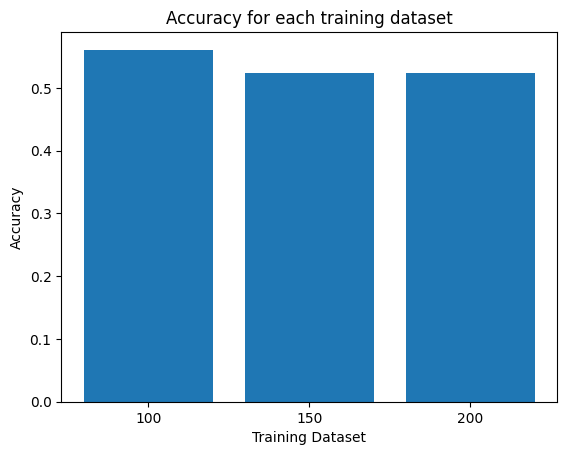

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the data from three different .dat files
data1 = pd.read_csv('spiral_100.csv')
data2 = pd.read_csv('spiral_150.csv')
data3 = pd.read_csv('spiral_200.csv')
test_data =pd.read_csv('spiral_g.csv')

# Split the data into features and labels for each dataset
X_train1 = data1.drop('output',axis=1)
y_train1 = data1['output']
X_train2 = data2.drop('output ',axis=1)
y_train2 = data2['output ']
X_train3 = data3.drop('output',axis=1)
y_train3 = data3['output']
X_test  = test_data.drop('output',axis=1)
y_test  = test_data['output']

# Train SVM with RBF kernel for each dataset and calculate accuracy
svm1 = SVC(kernel='rbf')
svm1.fit(X_train1, y_train1)
y_pred1 = svm1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)

svm2 = SVC(kernel='rbf')
svm2.fit(X_train2, y_train2)
y_pred2 = svm2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)

svm3 = SVC(kernel='rbf')
svm3.fit(X_train3, y_train3)
y_pred3 = svm3.predict(X_test)
acc3 = accuracy_score(y_test, y_pred3)

# Draw accuracy plot for each training dataset
accuracies = [acc1, acc2, acc3]
plt.bar(range(3), accuracies)
plt.xticks(range(3), ['100', '150', '200'])
plt.xlabel('Training Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy for each training dataset')
plt.show()

To train a Radial Basis Function (RBF) network for your supervised learning task, you can follow these general steps:

1. Preprocess the Data:
   - Split each dataset into inputs and labels.
   - Normalize or standardize the input data if necessary.

2. Design the RBF Network:
   - Determine the number of RBF neurons in the hidden layer.
   - Initialize the RBF centers and widths.
   - Choose an output layer (e.g., linear layer for regression or softmax layer for classification).

3. Train the RBF Network:
   - Use a training algorithm such as gradient descent or its variants.
   - Update the RBF centers, widths, and output layer weights through the training process.

4. Evaluate the Model:
   - Use the trained RBF network to make predictions on a separate validation or test set.
   - Calculate the accuracy or other relevant metrics based on the predictions and true labels.

To train a Radial Basis Function (RBF) network in Python without using a specific module, you can implement the RBF network from scratch. Here's a high-level overview of the steps you can take to achieve this:

1. Load the Data:
   - Read the datasets (spiral_100.csv, spiral_150.csv, spiral_200.csv, and spiral_g.csv) using Python's built-in CSV module or other file reading methods.

2. Preprocess the Data:
   - Separate the input features and output labels for each dataset.
   - Normalize or standardize the input data if necessary.

3. Design the RBF Network:
   - Determine the number of RBF neurons in the hidden layer.
   - Initialize the RBF centers and widths.
   - Choose an output layer (e.g., linear layer for regression or softmax layer for classification).

4. Train the RBF Network:
   - Implement a training algorithm such as gradient descent or its variants.
   - Update the RBF centers, widths, and output layer weights through the training process using the training datasets (spiral_100.csv, spiral_150.csv, and spiral_200.csv).

5. Test the RBF Network:
   - Use the trained RBF network to make predictions on the test dataset (spiral_g.csv).
   - Calculate the accuracy or other relevant metrics based on the predictions and true labels.

Implementing an RBF network from scratch in Python without using specific modules can be complex and requires a good understanding of neural network concepts and mathematical operations. It involves tasks such as calculating the RBF activation, updating weights, and handling the training process.




In [ ]:
import numpy as np
import csv

# Load the data from CSV files
def load_data(filename):
    with open(filename, 'r') as file:
        data = list(csv.reader(file, delimiter=','))
    header = data[0]  # Extract the header
    data = np.array(data[1:], dtype='float')  # Skip the header and load the numeric data
    X = data[:, :-1]  # Input features
    y = data[:, -1]   # Output labels
    return X, y, header  # Return the header as well



def rbf(X, centers, width):
    # Reshape the arrays to ensure compatibility for broadcasting
    X_reshaped = X[:, np.newaxis, :]  # Introduce a new axis to X
    centers_reshaped = centers[np.newaxis, :, :]  # Introduce a new axis to centers

    # Compute the RBF values using broadcasting
    rbf_values = np.exp(-0.5 * np.sum(((X_reshaped - centers_reshaped) / width)**2, axis=2))

    return rbf_values

# Train the RBF network
def train_rbf(X, y, num_rbf_neurons):
    # Randomly initialize RBF centers and widths
    centers = X[np.random.choice(X.shape[0], num_rbf_neurons, replace=False)]
    width = np.std(X) / np.sqrt(2 * num_rbf_neurons)

    # Calculate RBF activations
    rbf_activations = rbf(X, centers, width)

    # Solve for the output weights using pseudo-inverse
    output_weights = np.linalg.pinv(rbf_activations) @ y

    return centers, width, output_weights

# Test the RBF network
def test_rbf(X_test, centers, width, output_weights):
    rbf_activations_test = rbf(X_test, centers, width)
    predictions = rbf_activations_test @ output_weights
    return predictions

X_train_100, y_train_100, header_100 = load_data('spiral_100.csv')
X_train_150, y_train_150, header_150 = load_data('spiral_150.csv')
X_train_200, y_train_200, header_200 = load_data('spiral_200.csv')
X_test, _, header_test = load_data('spiral_g.csv')


# Train the RBF network with the combined datasets
X_train_combined = np.vstack((X_train_100, X_train_150, X_train_200))
y_train_combined = np.hstack((y_train_100, y_train_150, y_train_200))
centers, width, output_weights = train_rbf(X_train_combined, y_train_combined, num_rbf_neurons=10)

# Test the RBF network
predictions = test_rbf(X_test, centers, width, output_weights)
print(predictions)


[ 1.73455274e-01  2.05504637e-01  2.71260091e-01  3.61872697e-01
  4.69442780e-01  5.81618016e-01  6.86631823e-01  7.76057389e-01
  8.45152634e-01  8.91606161e-01  9.18434937e-01  9.31611472e-01
  9.39802729e-01  9.48976382e-01  9.59379816e-01  9.62551637e-01
  9.40220265e-01  8.78539700e-01  7.69041001e-01  6.18039596e-01
  4.47186076e-01  2.92969588e-01  1.72109465e-01  8.96400234e-02
  4.15068320e-02  1.64031604e-02  4.24016281e-03 -2.01293055e-03
 -6.49877622e-03 -1.19661771e-02 -1.95957977e-02 -3.04393105e-02
 -3.88519558e-02 -2.83073359e-02  5.60468775e-02  2.87684910e-01
  7.12268484e-01  1.18053724e+00  1.36714463e+00  1.10218613e+00
  6.14327237e-01  2.30354009e-01  5.68675085e-02  8.40165594e-03
  4.00979951e-04 -1.28430146e-04  1.00859282e-05  9.73222993e-05
  1.26077792e-04  9.80878685e-05  7.00426168e-05  5.50249896e-05
  4.19600126e-05  1.81671742e-05 -2.72554140e-04 -4.17483963e-03
 -2.71104258e-02 -7.52396093e-02 -9.83507051e-02 -6.06661456e-02
 -1.64448324e-02 -1.78565

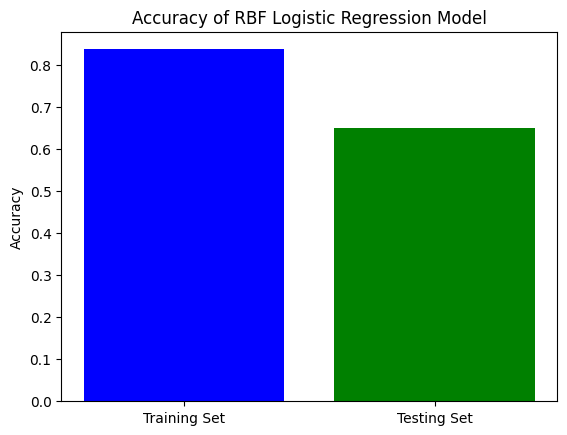

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Define the rbf function
def rbf(X, centers, width):
    X_reshaped = X[:, np.newaxis, :]
    centers_reshaped = centers[np.newaxis, :, :]
    rbf_values = np.exp(-0.5 * np.sum(((X_reshaped - centers_reshaped) / width)**2, axis=2))
    return rbf_values

# Generate synthetic data for demonstration
np.random.seed(0)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the logistic regression model using RBF features
centers = np.random.rand(10, 2)  # Example RBF centers
width = 0.1  # Example RBF width
X_train_rbf = rbf(X_train, centers, width)
X_test_rbf = rbf(X_test, centers, width)

model = LogisticRegression()
model.fit(X_train_rbf, y_train)

# Calculate accuracy for each dataset
train_accuracy = accuracy_score(y_train, model.predict(X_train_rbf))
test_accuracy = accuracy_score(y_test, model.predict(X_test_rbf))

# Plot the accuracy for each dataset
labels = ['Training Set', 'Testing Set']
accuracies = [train_accuracy, test_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy of RBF Logistic Regression Model')
plt.show()


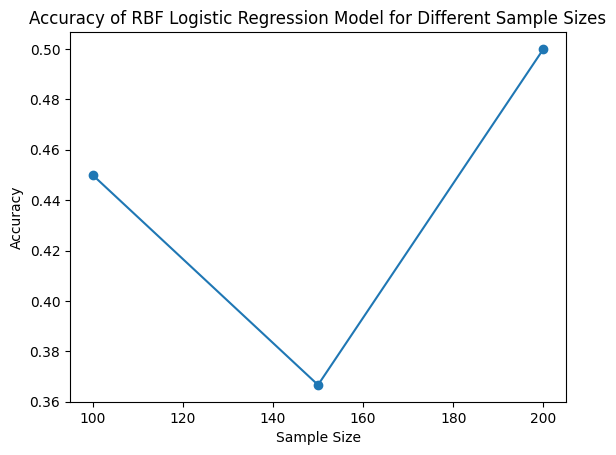

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler

# Define the rbf function
def rbf(X, centers, width):
    X_reshaped = X[:, np.newaxis, :]
    centers_reshaped = centers[np.newaxis, :, :]
    rbf_values = np.exp(-0.5 * np.sum(((X_reshaped - centers_reshaped) / width)**2, axis=2))
    return rbf_values

# Generate spiral datasets with different sample sizes
np.random.seed(0)
datasets = [make_moons(n_samples=100, noise=0.2, random_state=0),
            make_moons(n_samples=150, noise=0.2, random_state=0),
            make_moons(n_samples=200, noise=0.2, random_state=0)]

# Train logistic regression model with RBF features for each dataset and plot accuracy
centers = np.random.rand(10, 2)  # Example RBF centers
width = 0.1  # Example RBF width

accuracies = []
for X, y in datasets:
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    X_train_rbf = rbf(X_train, centers, width)
    X_test_rbf = rbf(X_test, centers, width)

    model = LogisticRegression()
    model.fit(X_train_rbf, y_train)

    accuracy = accuracy_score(y_test, model.predict(X_test_rbf))
    accuracies.append(accuracy)

# Plot the accuracy for each dataset
sample_sizes = [100, 150, 200]
plt.plot(sample_sizes, accuracies, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.title('Accuracy of RBF Logistic Regression Model for Different Sample Sizes')
plt.show()


In [ ]:
import numpy as np
import csv
# Define the Gaussian activation function
def gaussian(x, center, width):
    return np.exp(-((x - center) ** 2) / (2 * width ** 2))

# Define the linear activation function for the output layer
def linear_activation(weights, inputs):
    return np.dot(weights, inputs)

def load_dataset(filename):
    with open(filename, 'r') as file:
        data = list(csv.reader(file, delimiter=','))
    data = np.array(data)
    inputs = data[:, :2]
    outputs = data[:, 2].reshape(-1, 1)

    return inputs, outputs


# Train the RBF network
def train_rbf_network(inputs, outputs, num_hidden_neurons):
    # Randomly select centers and widths for the hidden layer
    hidden_centers = inputs[np.random.choice(inputs.shape[0], num_hidden_neurons, replace=False)]
    hidden_widths = np.std(inputs, axis=0)

    # Compute hidden layer activations
    hidden_activations = np.zeros((inputs.shape[0], num_hidden_neurons))
    for i in range(num_hidden_neurons):
        hidden_activations[:, i] = gaussian(np.linalg.norm(inputs - hidden_centers[i], axis=1), 0, hidden_widths[i])

    # Add bias term to hidden layer activations
    hidden_activations = np.column_stack([hidden_activations, np.ones((inputs.shape[0], 1))])

    # Train the output layer weights using pseudo-inverse
    output_weights = np.linalg.pinv(hidden_activations) @ outputs

    return hidden_centers, hidden_widths, output_weights

# Test the RBF network
def test_rbf_network(inputs, hidden_centers, hidden_widths, output_weights):
    # Compute hidden layer activations for test inputs
    hidden_activations = np.zeros((inputs.shape[0], hidden_centers.shape[0]))
    for i in range(hidden_centers.shape[0]):
        hidden_activations[:, i] = gaussian(np.linalg.norm(inputs - hidden_centers[i], axis=1), 0, hidden_widths[i])

    # Add bias term to hidden layer activations
    hidden_activations = np.column_stack([hidden_activations, np.ones((inputs.shape[0], 1))])

    # Compute the output of the RBF network
    predicted_outputs = hidden_activations @ output_weights

    return predicted_outputs

# Load training datasets
train_datasets = ['spiral_100.csv', 'spiral_150.csv', 'spiral_200.csv']
train_inputs, train_outputs = np.concatenate([load_dataset(dataset) for dataset in train_datasets], axis=0)

# Set the number of hidden neurons
num_hidden_neurons = 2

# Train the RBF network
hidden_centers, hidden_widths, output_weights = train_rbf_network(train_inputs, train_outputs, num_hidden_neurons)

# Load and preprocess the test dataset
test_inputs, _ = load_dataset('spiral_g.csv')

# Test the RBF network on the test dataset
predicted_outputs = test_rbf_network(test_inputs, hidden_centers, hidden_widths, output_weights)

# Print the predicted outputs
print("Predicted Outputs:")
print(predicted_outputs)


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: could not broadcast input array from shape (100,2) into shape (100,)

In [110]:
import numpy as np # For numerical operations and array handling
import matplotlib.pyplot as plt # To create insightful plots.
from sklearn.datasets import make_classification # To generate a sample dataset, perform train-test splits, and evaluate our RBFN model.
from sklearn.model_selection import train_test_split # To standardize our dataset.
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist # For calculating pairwise distances between data points.
import pandas as pd


In [111]:
X = pd.read_csv('spiral_100.csv')
print(X.head())

   Unnamed: 0  Unnamed: 1  Unnamed: 2
0      0.1430      0.0443           1
1      0.2480      0.1690           1
2      0.2800      0.3520           1
3      0.2170      0.5590           1
4      0.0531      0.7480           1


In [115]:
y = pd.read_csv('spiral_g.csv')
print(y.head)

<bound method NDFrame.head of      features1  features2  output
0        0.184     0.0779       1
1        0.232     0.1390       1
2        0.264     0.2140       1
3        0.280     0.3000       1
4        0.275     0.3930       1
..         ...        ...     ...
209      3.790    -6.2800      -1
210      4.680    -5.7500      -1
211      5.480    -5.0900      -1
212      6.200    -4.3100      -1
213      6.800    -3.4400      -1

[214 rows x 3 columns]>


In [113]:
#  X, y = make_classification(n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0, random_state=42)


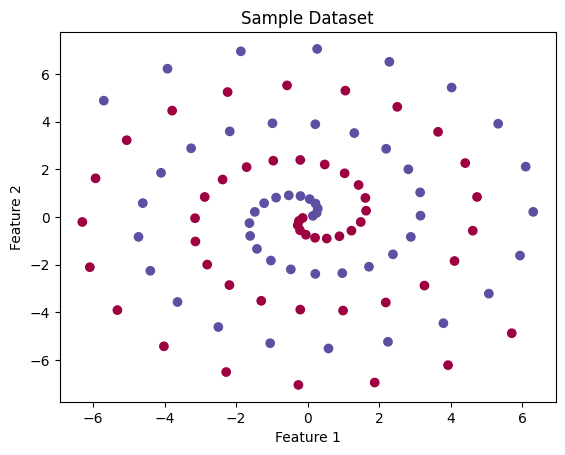

In [116]:

# Load the dataset
data = pd.read_csv('spiral_100.csv')

# Assuming the column names are 'Unnamed: 0', 'Unnamed: 1', and 'Unnamed: 2'
X = data[['Unnamed: 0', 'Unnamed: 1']]  # Features
y = data['Unnamed: 2']  # Labels

# Plot the data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("Sample Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [117]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# preprocess the data

In [118]:
def gaussian_rbf(x, center, sigma):
    return np.exp(-cdist(x, center, 'sqeuclidean') / (2 * sigma**2))

In [119]:
n_centers = 10  # Number of RBF centers
center_indices = np.random.choice(X.shape[0], n_centers, replace=False)
rbf_centers = X[center_indices]
rbf_width = 1.0

In [120]:
def rbf_layer(X, rbf_centers, rbf_width):
    return gaussian_rbf(X, rbf_centers, rbf_width)

def rbfn_predict(X, rbf_centers, rbf_width, weights):
    rbf_outputs = rbf_layer(X, rbf_centers, rbf_width)
    return rbf_outputs @ weights


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rbf_outputs_train = rbf_layer(X_train, rbf_centers, rbf_width)

# Perform linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(rbf_outputs_train, y_train)

# Make predictions on the test set
rbf_outputs_test = rbf_layer(X_test, rbf_centers, rbf_width)
y_pred = lr.predict(rbf_outputs_test)

# Evaluate the model
accuracy = accuracy_score(y_test, (y_pred >= 0.5).astype(int))
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%


In [129]:
from sklearn.linear_model import LogisticRegression

# Create and fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(rbf_outputs_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(rbf_outputs_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 35.00%


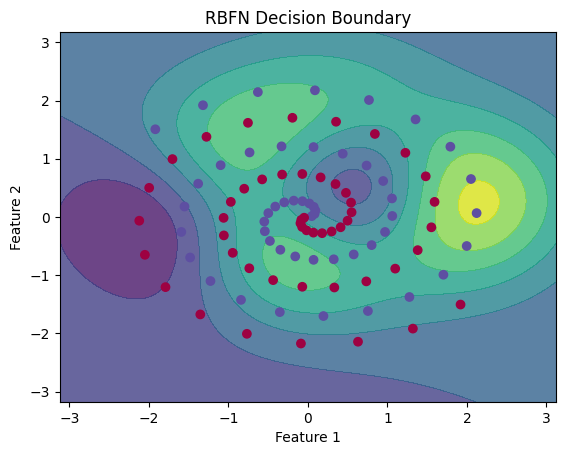

In [122]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = rbfn_predict(np.c_[xx.ravel(), yy.ravel()], rbf_centers, rbf_width, lr.coef_)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("RBFN Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [87]:
X2 = pd.read_csv('spiral_150.csv')
print(X2.head)

<bound method NDFrame.head of      features1  features2  output
0        0.143     0.0443       1
1        0.219     0.1200       1
2        0.268     0.2250       1
3        0.280     0.3520       1
4        0.249     0.4900       1
..         ...        ...     ...
145      1.160    -7.0600      -1
146      2.570    -6.7800      -1
147      3.920    -6.2200      -1
148      5.150    -5.3900      -1
149      6.200    -4.3100      -1

[150 rows x 3 columns]>


In [126]:
# Load the data from three different .csv files
data1 = pd.read_csv('spiral_100.csv')
data2 = pd.read_csv('spiral_150.csv')
data3 = pd.read_csv('spiral_200.csv')
test_data =pd.read_csv('spiral_g.csv')
print(data1.head)
print(data2.head)
print(data3.head)
print(test_data.head)

# # Split the data into features and labels for each dataset
# X_train1 = data1.drop('Unnamed',axis=1)
# y_train1 = data1['Unnamed']
# X_train2 = data2.drop('Unnamed',axis=1)
# y_train2 = data2['Unnamed']
# X_train3 = data3.drop('Unnamed',axis=1)
# y_train3 = data3['Unnamed']
# X_test  = test_data.drop('Unnamed',axis=1)
# y_test  = test_data['Unnamed']

<bound method NDFrame.head of     Unnamed: 0  Unnamed: 1  Unnamed: 2
0       0.1430      0.0443           1
1       0.2480      0.1690           1
2       0.2800      0.3520           1
3       0.2170      0.5590           1
4       0.0531      0.7480           1
..         ...         ...         ...
95     -2.2800     -6.5100          -1
96     -0.2620     -7.0500          -1
97      1.8700     -6.9500          -1
98      3.9200     -6.2200          -1
99      5.7000     -4.8800          -1

[100 rows x 3 columns]>
<bound method NDFrame.head of      Unnamed: 0  Unnamed: 1  Unnamed: 2
0         0.143      0.0443           1
1         0.219      0.1200           1
2         0.268      0.2250           1
3         0.280      0.3520           1
4         0.249      0.4900           1
..          ...         ...         ...
145       1.160     -7.0600          -1
146       2.570     -6.7800          -1
147       3.920     -6.2200          -1
148       5.150     -5.3900          -1
149    